## Visual for results (Simulation data) forward--section3.1

### Input sequence [4,250,9]--represent the pressure in the test
### adj:[9,9]

### Output sequence [4,250,3]--represent the force in the test

In [1]:
import torch
import os
import sys

In [2]:
directory_path = os.path.dirname(os.getcwd())
# Optionally, print all paths to confirm the addition
for path in sys.path:
    print("Import path:", path)

Import path: /root/autodl-tmp/Gust/Visual
Import path: /root/miniconda3/lib/python38.zip
Import path: /root/miniconda3/lib/python3.8
Import path: /root/miniconda3/lib/python3.8/lib-dynload
Import path: 
Import path: /root/miniconda3/lib/python3.8/site-packages
Import path: /root/workspace/rsl_rl
Import path: /root/swimmingdog_mujoco


In [3]:
sys.path.insert(0, "/root/autodl-tmp/Gust") #please add your path case by case linux or wins
# 添加 Models 文件夹路径到 sys.path
sys.path.append('/root/autodl-tmp/Gust/Models')

In [4]:
print(sys.path)

['/root/autodl-tmp/Gust', '/root/autodl-tmp/Gust/Visual', '/root/miniconda3/lib/python38.zip', '/root/miniconda3/lib/python3.8', '/root/miniconda3/lib/python3.8/lib-dynload', '', '/root/miniconda3/lib/python3.8/site-packages', '/root/workspace/rsl_rl', '/root/swimmingdog_mujoco', '/root/autodl-tmp/Gust/Models']


In [5]:
model_path = "/root/autodl-tmp/Gust/Checkpoints/simu2d_forward/best_model.pth"
dataset_path = "/root/autodl-tmp/Gust/Dataset/Simulations/Sim_no_aug_sec_3_1.pt"

In [6]:
paras = torch.load(model_path)

### model paras
#### We recommend:
- **num_layers**: 4
- **nhead**: 4
- **input_dim**: 16
- **output_dim**: 1
- **d_model**: 20
- **num_sensors**: 16

In [7]:
from Models.GAT_Transformer import TransformerDecoder

/root/miniconda3/lib/python3.8/site-packages/torch_geometric/typing.py:68: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: /root/miniconda3/lib/python3.8/site-packages/libpyg.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSsb
  warnings.warn(f"An issue occurred while importing 'pyg-lib'. "
/root/miniconda3/lib/python3.8/site-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /root/miniconda3/lib/python3.8/site-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSsb
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/root/miniconda3/lib/python3.8/site-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /root/miniconda3/lib/python3.8/site-packages/torch_cluster/_version_cuda.so: undefined symbol: _ZN5torch3ji

Using device: cuda


In [8]:
yaml_path = "/root/autodl-tmp/Gust/Checkpoints/simu2d_forward/config.yaml"

In [9]:
import yaml
# 打开并读取 YAML 文件
with open(yaml_path, 'r') as file:
    set_dict = yaml.safe_load(file)

In [10]:
model = TransformerDecoder(**set_dict["Model"]["details"])

In [11]:
model.load_state_dict(paras)

<All keys matched successfully>

In [12]:
# 切换到评估模式
model.eval()

TransformerDecoder(
  (embedding): Linear(in_features=9, out_features=20, bias=True)
  (layers): ModuleList(
    (0-3): 4 x TransformerDecoderLayer(
      (self_attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=20, out_features=20, bias=True)
      )
      (norm1): LayerNorm((20,), eps=1e-05, elementwise_affine=True)
      (graph_attn): GraphAttentionLayer(
        (gat): GATConv(20, 5, heads=4)
      )
      (norm2): LayerNorm((20,), eps=1e-05, elementwise_affine=True)
      (ffn): Sequential(
        (0): Linear(in_features=21, out_features=80, bias=True)
        (1): ReLU()
        (2): Linear(in_features=80, out_features=20, bias=True)
      )
      (norm3): LayerNorm((20,), eps=1e-05, elementwise_affine=True)
    )
  )
  (output_layer): Linear(in_features=20, out_features=1, bias=True)
)

In [13]:
test_dataset = torch.load(dataset_path)


In [14]:
from torch.utils.data import DataLoader

In [15]:
tensorset = test_dataset["test_dataset"]

In [16]:
test_loader = DataLoader(tensorset, batch_size = 30, shuffle=True)

### plot results

In [17]:
for data,adj,truth in test_loader:
   adj = adj[0,:,:]
   test_out = model(data,adj)

In [18]:
import torch.nn as nn

In [19]:
# 创建 MSE 损失函数
mse_loss_fn = nn.MSELoss()

# 计算 MSE 损失
mse_loss = mse_loss_fn(test_out, truth)

# 打印 MSE 损失值
print("Test MSE Loss:", mse_loss.item())

Test MSE Loss: 0.0009217537008225918


In [20]:
test_out.shape

torch.Size([20, 250, 1])

In [21]:
test_out = test_out.detach().numpy()

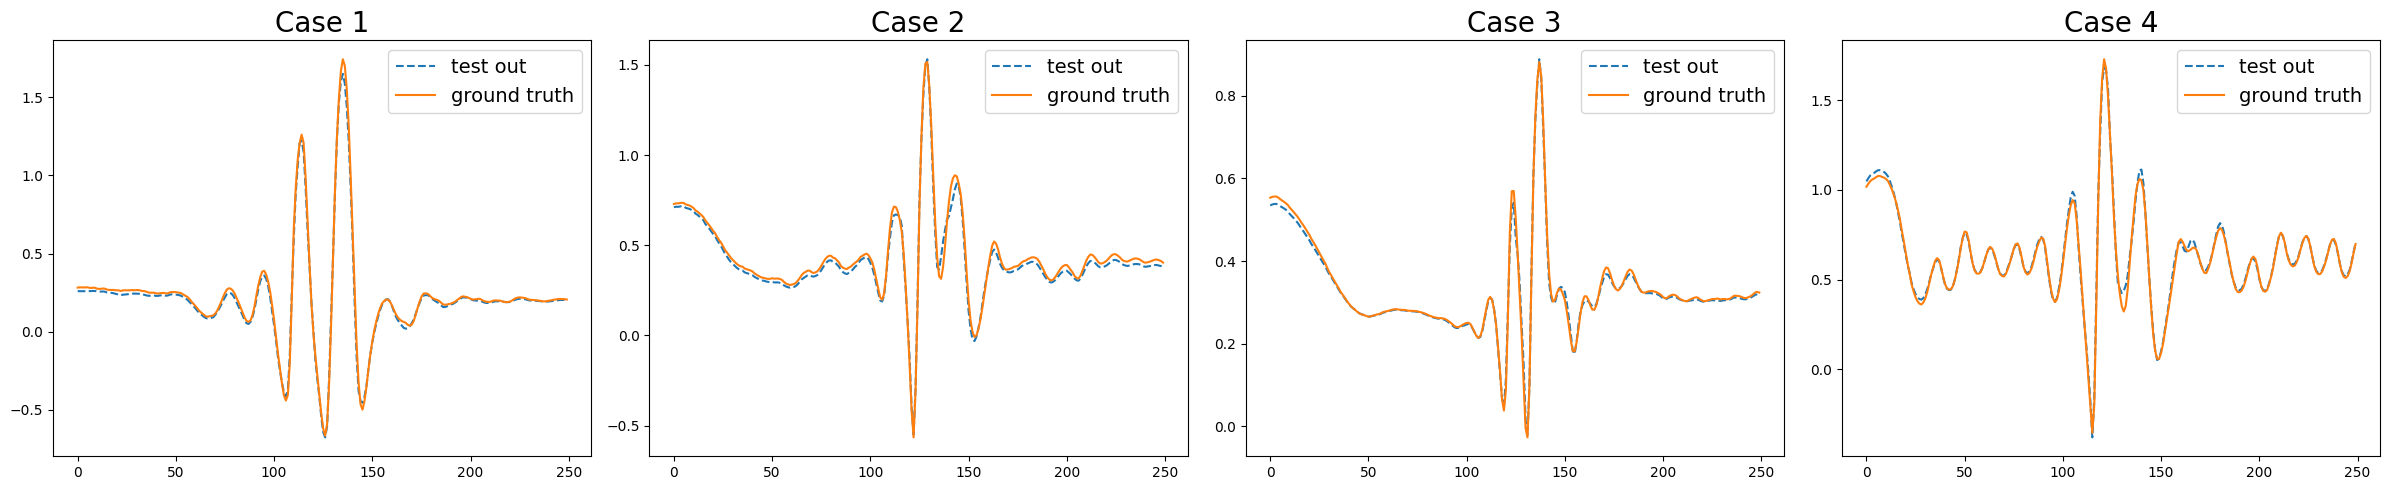

In [22]:
import matplotlib.pyplot as plt

# Create a figure and three subplots
fig, axs = plt.subplots(1, 4, figsize=(24, 5))

# Plot the first subplot (0th dimension)
axs[0].plot(test_out[0, :, 0], label="test out", linestyle="--")
axs[0].plot(truth[0, :, 0], label="ground truth")
axs[0].set_title("Case 1", fontsize=20)  # Larger title font size
axs[0].legend(fontsize=14)  # Larger legend font size

# Plot the second subplot (1st dimension)
axs[1].plot(test_out[1, :, 0], label="test out", linestyle="--")
axs[1].plot(truth[1, :, 0], label="ground truth")
axs[1].set_title("Case 2", fontsize=20)
axs[1].legend(fontsize=14)

# Plot the third subplot (2nd dimension)
axs[2].plot(test_out[2, :, 0], label="test out", linestyle="--")
axs[2].plot(truth[2, :, 0], label="ground truth")
axs[2].set_title("Case 3", fontsize=20)
axs[2].legend(fontsize=14)

# Plot the fourth subplot (3rd dimension)
axs[3].plot(test_out[3, :, 0], label="test out", linestyle="--")
axs[3].plot(truth[3, :, 0], label="ground truth")
axs[3].set_title("Case 4", fontsize=20)
axs[3].legend(fontsize=14)

# Display the plots
plt.tight_layout()

# Save the figure with higher dpi
plt.savefig("Simu.png", dpi=300)


### plot attention heatmap

In [33]:
atten = model._get_layer_attention().detach().numpy()

torch.Size([12, 250, 250])


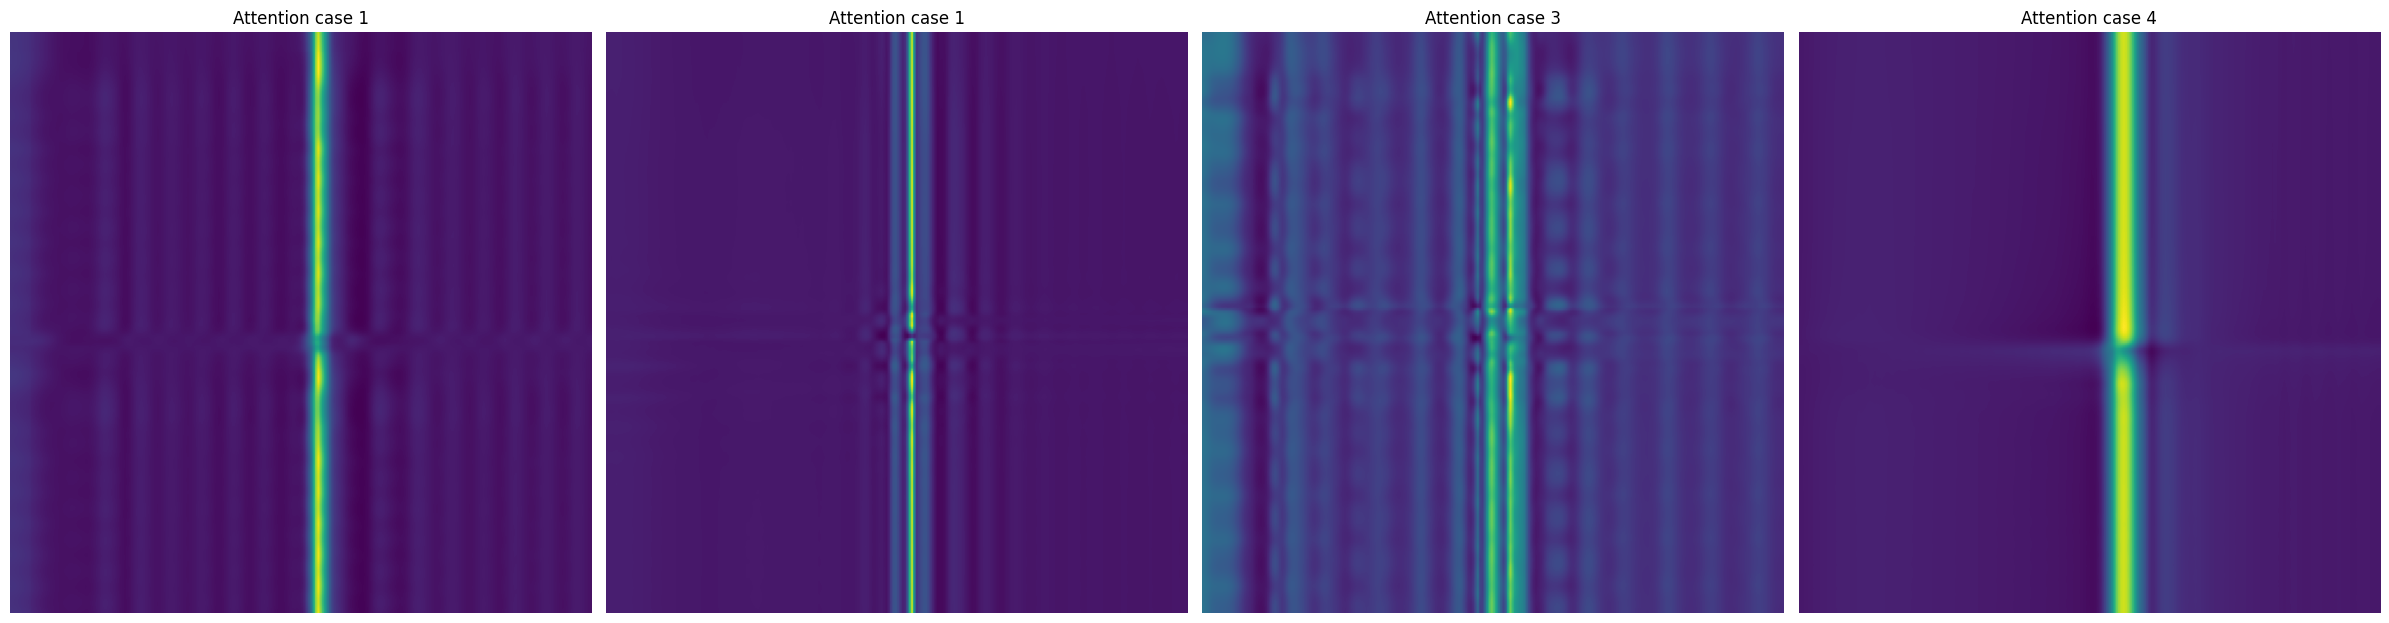

In [39]:
import matplotlib.pyplot as plt

# Assuming atten is a tensor or numpy array with shape [batch, height, width, channels] or [batch, channels, height, width]

# Create a figure and 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(24, 8))

# Plot the first subplot (attention 0)
axs[0].imshow(atten[0, :, :], cmap='viridis')
axs[0].set_title("Attention case 1")

# Plot the second subplot (attention 1)
axs[1].imshow(atten[1, :, :], cmap='viridis')
axs[1].set_title("Attention case 1")

# Plot the third subplot (attention 2)
axs[2].imshow(atten[2, :, :], cmap='viridis')
axs[2].set_title("Attention case 3")

# Plot the fourth subplot (attention 3)
axs[3].imshow(atten[3, :, :], cmap='viridis')
axs[3].set_title("Attention case 4")

for ax in axs:
   ax.axis('off')  # Hide x and y labels, ticks, and the axis

# Display the plots
plt.tight_layout()

plt.savefig("Simu_atten.png",dpi=300,bbox_inches ="tight")
